In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\laasy\Downloads\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

418

In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

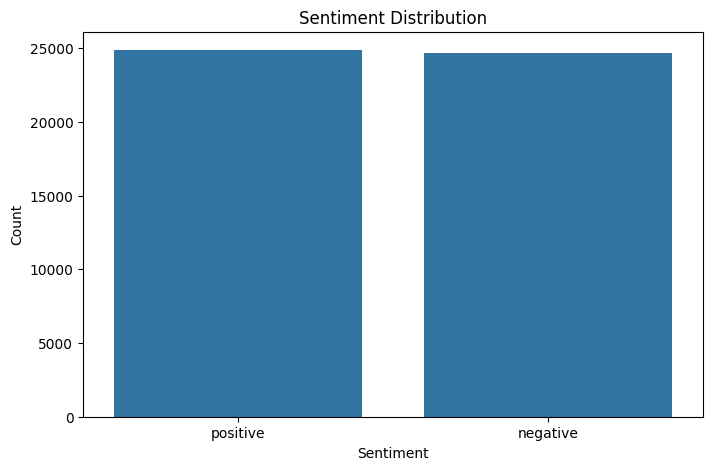

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
x=df['review']
y=df['sentiment']

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [15]:
def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove whitespaces
    return text 

In [16]:

import string
df['preprocessed']=x.apply(preprocess)

In [17]:
df

,review,sentiment,preprocessed
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...


In [18]:
x=df['preprocessed']
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape

(39665,)

In [20]:
cv=CountVectorizer()
x_train_vec=cv.fit_transform(x_train)
x_test_vec=cv.transform(x_test)


In [21]:
model=MultinomialNB()
model.fit(x_train_vec,y_train)
pred=model.predict(x_test_vec)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))  

              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      4939
    positive       0.87      0.82      0.84      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



<Axes: >

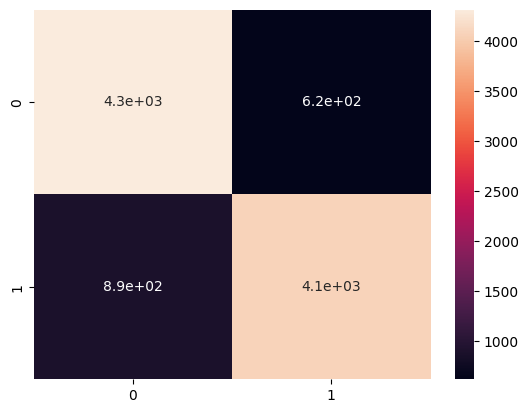

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [24]:
new_data = ['the movie was very bad']  # new_data should be a list of strings
x_test1_vec = cv.transform(new_data)
pred = model.predict(x_test1_vec)
print(pred)

['negative']


# LSTM Model for Sentiment classification

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
# Tokenize the input text
max_features = 10000  # Only consider the top 10,000 words
max_len = 200  # Only consider the first 200 words of each review

# Tokenizer to convert text to sequences of integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['preprocessed'])
sequences = tokenizer.texts_to_sequences(df['preprocessed'])

# Pad sequences to ensure uniform input length
x = pad_sequences(sequences, maxlen=max_len)

# Labels
y = df['sentiment'].values

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model architecture
model = Sequential()

# Embedding layer: maps words to dense vectors
# Input_dim: vocab size, Output_dim: dimension of embedding, Input_length: max number of words in a sequence
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

# LSTM layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test score: {score}")
print(f"Test accuracy: {acc}")


C:\Users\laasy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 340s 268ms/step - accuracy: 0.7232 - loss: 0.5373 - val_accuracy: 0.7502 - val_loss: 0.5019
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 328s 264ms/step - accuracy: 0.8350 - loss: 0.3854 - val_accuracy: 0.8628 - val_loss: 0.3427
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 316s 255ms/step - accuracy: 0.8808 - loss: 0.2954 - val_accuracy: 0.8726 - val_loss: 0.3139
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 323s 260ms/step - accuracy: 0.9110 - loss: 0.2276 - val_accuracy: 0.8744 - val_loss: 0.3073
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 322s 260ms/step - accuracy: 0.9272 - loss: 0.1901 - val_accuracy: 0.8787 - val_loss: 0.3200
310/310 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.8803 - loss: 0.3178
Test score: 0.31996363401412964
Test accuracy: 0.878693163394928


# BIDIRECTIONAL LSTM Model 

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

# Load the dataset (you need to load your DataFrame 'df')
# Ensure the DataFrame has 'preprocessed' column for cleaned text and 'sentiment' as label

# Label encoding the sentiment (if not already done)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Tokenize the input text
max_features = 10000  # Use top 10,000 words
max_len = 200  # Max length of each review

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['preprocessed'])
sequences = tokenizer.texts_to_sequences(df['preprocessed'])

# Pad sequences for uniform input length
x = pad_sequences(sequences, maxlen=max_len)

# Labels (target)
y = df['sentiment'].values

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Load GloVe Embeddings
embedding_index = {}
glove_file = r"C:\Users\laasy\Downloads\glove.6B\glove.6B.100d.txt"  # Replace with your GloVe file path

with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_dim = 100  # GloVe 100d
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_features, embedding_dim))

for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the BiLSTM Model
model = Sequential()

# Embedding layer with pretrained GloVe weights
model.add(Embedding(input_dim=max_features, 
                    output_dim=embedding_dim, 
                    input_length=max_len, 
                    weights=[embedding_matrix], 
                    trainable=False))  # Keep GloVe weights frozen

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))

# Fully connected layer with sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=3e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test score: {score}")
print(f"Test accuracy: {acc}")

# Save the model
model.save("bilstm_glove_model.h5")


Epoch 1/5


C:\Users\laasy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1240/1240 ━━━━━━━━━━━━━━━━━━━━ 246s 195ms/step - accuracy: 0.6293 - loss: 0.6336 - val_accuracy: 0.7847 - val_loss: 0.4782
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 241s 194ms/step - accuracy: 0.7445 - loss: 0.5239 - val_accuracy: 0.8037 - val_loss: 0.4289
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 282s 227ms/step - accuracy: 0.7836 - loss: 0.4596 - val_accuracy: 0.8306 - val_loss: 0.3865
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 236s 190ms/step - accuracy: 0.8135 - loss: 0.4131 - val_accuracy: 0.8390 - val_loss: 0.3640
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 268s 216ms/step - accuracy: 0.8224 - loss: 0.3898 - val_accuracy: 0.8506 - val_loss: 0.3501
310/310 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.8499 - loss: 0.3530


Test score: 0.3500795364379883
Test accuracy: 0.850559651851654


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
url = r"C:\Users\laasy\Downloads\IMDB Dataset.csv"
df = pd.read_csv(url)

# Data Preprocessing
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf.fit_transform(df['review'])
y = df['sentiment']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Gradient Boosting Model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)

# Display the results
print(f"Logistic Regression Accuracy: {log_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"Gradient Boosting Accuracy: {gb_acc}")


Logistic Regression Accuracy: 0.8913
Random Forest Accuracy: 0.854
Gradient Boosting Accuracy: 0.81


In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier without the deprecated parameter
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Calculate accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_acc}")


XGBoost Accuracy: 0.8571


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_acc}")
